In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [2]:
url = "https://github.com/trending"

In [3]:
def since(daterange):
    daterange.lower()
    url = ''
    if daterange == "a":
        url = "https://github.com/trending?since=monthly"
    elif daterange == "b":
        url = "https://github.com/trending?since=weekly"
    else:
        url = "https://github.com/trending"
    return url

In [5]:
userinput  = input("Choose (a) for Monthly -(b) for Weekly -(c) for Daily: ")
url  = since(userinput)

Choose (a) for Monthly -(b) for Weekly -(c) for Daily: a


In [6]:
def downloadpage(url):
    re = requests.get(url)
    soup = BeautifulSoup(re.text,"html.parser")
    return soup

In [7]:
page = downloadpage(url)

In [8]:
def user(box):
    h1 =box.find("h1",class_="h3 lh-condensed")
    a = h1.find('a',href=True)
    return a['href'][1:]

In [9]:
def technology(box):
    div = box.find("div",class_="f6 color-fg-muted mt-2")
    lang = div.find("span",itemprop = "programmingLanguage")
    if lang!=None:
            return lang.text
    else:
            return "None"

In [10]:
def starsnForks(box):
    a = box.find_all('a',class_="Link--muted d-inline-block mr-3")
    starnfork = [a[0].get_text().strip(),a[1].get_text().strip()]
    return starnfork

In [11]:
def builtBy(box):
    span = box.find('span',class_="d-inline-block mr-3")
    return [x.get('href')[1:] for x in span.find_all('a',class_="d-inline-block")]

In [12]:
def main(page):
    for box in page.find_all("article",class_='Box-row'):
        users = user(box)
        tech = technology(box)
        star = starsnForks(box)[0]
        fork = starsnForks(box)[1]
        contributers = builtBy(box)
        row = {"Repository":users,"Technology":tech,"Stars":star,"Forks":fork,"Built_by":contributers}
        table.loc[len(table)] = [users,tech,star,fork,contributers]

In [13]:
table=pd.DataFrame({"Repository":[],"Technology":[],"Stars":[],"Forks":[],"Built_by":[]})
main(page)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [14]:
table.head()

,Repository,Technology,Stars,Forks,Built_by
0,DataTalksClub/data-engineering-zoomcamp,Jupyter Notebook,"11,268","2,451","[alexeygrigorev, sejalv, Victoriapm, AnkushKha..."
1,openai/openai-cookbook,Python,"10,239","1,007","[ted-at-openai, colin-jarvis, BorisPower, cmur..."
2,LAION-AI/Open-Assistant,Python,"5,172",441,"[fozziethebeat, yk, andreaskoepf, AbdBarho, an..."
3,brycedrennan/imaginAIry,Python,"5,446",242,"[brycedrennan, PaulMest, kianmeng, dfyx, mqudsi]"
4,lencx/ChatGPT,Rust,"6,304",482,"[lencx, yixinBC, tk103331, Irene-123, VinchanGit]"


In [15]:
userrepo = table["Repository"].str.split("/",n=1,expand =True)

In [16]:
table["User"] = userrepo[0]

In [17]:
table.drop(columns=["Repository"],inplace=True)

In [18]:
table["Repository"] = userrepo[1]

In [19]:
column = table.pop("User")
table.insert(0,'User',column)

In [20]:
column = table.pop("Repository")
table.insert(1,'Repository',column)

In [21]:
table.head()

,User,Repository,Technology,Stars,Forks,Built_by
0,DataTalksClub,data-engineering-zoomcamp,Jupyter Notebook,"11,268","2,451","[alexeygrigorev, sejalv, Victoriapm, AnkushKha..."
1,openai,openai-cookbook,Python,"10,239","1,007","[ted-at-openai, colin-jarvis, BorisPower, cmur..."
2,LAION-AI,Open-Assistant,Python,"5,172",441,"[fozziethebeat, yk, andreaskoepf, AbdBarho, an..."
3,brycedrennan,imaginAIry,Python,"5,446",242,"[brycedrennan, PaulMest, kianmeng, dfyx, mqudsi]"
4,lencx,ChatGPT,Rust,"6,304",482,"[lencx, yixinBC, tk103331, Irene-123, VinchanGit]"


In [22]:
fname = datetime.datetime.now().strftime("%b_%d_%H,%M:%S")

In [31]:
table.to_csv(f"{fname}.csv")

<AxesSubplot:ylabel='Technology'>

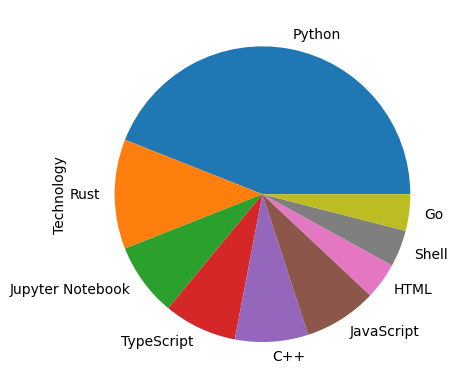

In [23]:
table['Technology'].value_counts().plot(kind="pie",x="technology",y="counts")

In [24]:
table["Contributions"] = table["Built_by"].apply(lambda row: len(row))

In [29]:
table.tail()

,User,Repository,Technology,Stars,Forks,Built_by,Contributions
20,sczhou,CodeFormer,Python,"3,986",707,"[sczhou, JohanAR, chenxwh]",3
21,lucidrains,PaLM-rlhf-pytorch,Python,"4,647",309,"[lucidrains, ell-hol, eltociear, hypnopump]",4
22,pola-rs,polars,Rust,"13,027",648,"[ritchie46, stinodego, alexander-beedie, zunde...",5
23,facebook,folly,C++,"24,624","5,025","[yfeldblum, Orvid, simpkins, andriigrynenko, d...",5
24,AmruthPillai,Reactive-Resume,TypeScript,"10,731","1,227","[AmruthPillai, gianantoniopini, apps/dependabo...",5


<BarContainer object of 5 artists>

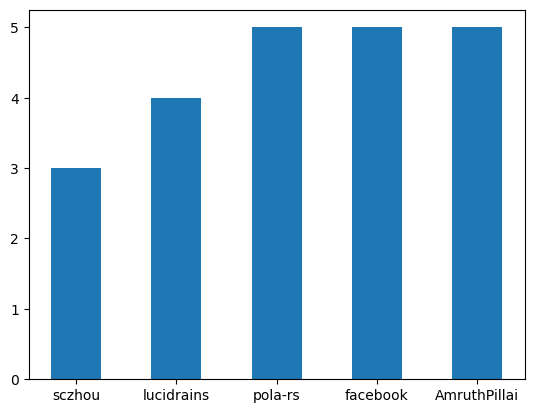

In [35]:
plt.bar(table["User"][-5:],table['Contributions'][-5:],width=0.5)